In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
data = pd.read_csv("Churn_Modelling.csv", index_col='RowNumber')
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df = data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [6]:
X_columns = df.columns.tolist()[2:12]
y_columns = df.columns.tolist()[-1:]
print(f'All columns: {df.columns.tolist()}')
print(f'X values: {X_columns}')
print(f'y values: {y_columns}')

All columns: ['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
X values: ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
y values: ['Exited']


In [7]:
X = df[X_columns].values 
y = df[y_columns].values 

In [8]:
print("Original:", X[:8,1])
from sklearn.preprocessing import LabelEncoder

label_X_country_encoder = LabelEncoder()
X[:,1] = label_X_country_encoder.fit_transform(X[:,1])
print("Encoded: " ,X[:8,1])

Original: ['France' 'Spain' 'France' 'France' 'Spain' 'Spain' 'France' 'Germany']
Encoded:  [0 2 0 0 2 2 0 1]


In [9]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


pipeline = Pipeline(
    [('Categorizer', ColumnTransformer(
         [ # Gender
          ("Gender Label encoder", OneHotEncoder(categories='auto', drop='first'), [2]),
           # Geography
          ("Geography One Hot", OneHotEncoder(categories='auto', drop='first'), [1])
         ], remainder='passthrough', n_jobs=1)),
     # Standard Scaler for the classifier
    ('Normalizer', StandardScaler())
    ])

In [10]:
X = pipeline.fit_transform(X)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

In [12]:
print(f'training shapes: {X_train.shape}, {y_train.shape}')
print(f'testing shapes: {X_test.shape}, {y_test.shape}')

training shapes: (8000, 11), (8000, 1)
testing shapes: (2000, 11), (2000, 1)


In [13]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

classifier = Sequential()

In [14]:
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
classifier.add(Dense(6, activation = 'relu', input_shape = (X_train.shape[1], )))
classifier.add(Dropout(rate=0.1)) 

In [15]:
# Adding the second hidden layer
# Notice that we do not need to specify input dim. 
classifier.add(Dense(6, activation = 'relu')) 
classifier.add(Dropout(rate=0.1)) 

In [16]:
# Adding the output layer
# Notice that we do not need to specify input dim. 
# we have an output of 1 node, which is the the desired dimensions of our output (stay with the bank or not)
# We use the sigmoid because we want probability outcomes
classifier.add(Dense(1, activation = 'sigmoid')) 

In [17]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dropout (Dropout)           (None, 6)                 0         
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dropout_1 (Dropout)         (None, 6)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [18]:
classifier.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [19]:
history = classifier.fit(X_train, y_train, batch_size=32, epochs=200, validation_split=0.1, verbose=2)

Epoch 1/200
225/225 - 1s - loss: 0.5558 - accuracy: 0.7443 - val_loss: 0.4814 - val_accuracy: 0.7975 - 743ms/epoch - 3ms/step
Epoch 2/200
225/225 - 0s - loss: 0.4842 - accuracy: 0.7922 - val_loss: 0.4482 - val_accuracy: 0.8000 - 200ms/epoch - 887us/step
Epoch 3/200
225/225 - 0s - loss: 0.4640 - accuracy: 0.7953 - val_loss: 0.4380 - val_accuracy: 0.7975 - 191ms/epoch - 850us/step
Epoch 4/200
225/225 - 0s - loss: 0.4561 - accuracy: 0.7979 - val_loss: 0.4309 - val_accuracy: 0.7975 - 191ms/epoch - 849us/step
Epoch 5/200
225/225 - 0s - loss: 0.4514 - accuracy: 0.7987 - val_loss: 0.4269 - val_accuracy: 0.7975 - 181ms/epoch - 804us/step
Epoch 6/200
225/225 - 0s - loss: 0.4453 - accuracy: 0.7983 - val_loss: 0.4240 - val_accuracy: 0.7975 - 189ms/epoch - 840us/step
Epoch 7/200
225/225 - 0s - loss: 0.4419 - accuracy: 0.8003 - val_loss: 0.4209 - val_accuracy: 0.8000 - 198ms/epoch - 878us/step
Epoch 8/200
225/225 - 0s - loss: 0.4428 - accuracy: 0.7987 - val_loss: 0.4189 - val_accuracy: 0.7975 - 198

Epoch 65/200
225/225 - 0s - loss: 0.3751 - accuracy: 0.8508 - val_loss: 0.3401 - val_accuracy: 0.8600 - 191ms/epoch - 848us/step
Epoch 66/200
225/225 - 0s - loss: 0.3729 - accuracy: 0.8526 - val_loss: 0.3398 - val_accuracy: 0.8625 - 181ms/epoch - 806us/step
Epoch 67/200
225/225 - 0s - loss: 0.3784 - accuracy: 0.8506 - val_loss: 0.3401 - val_accuracy: 0.8625 - 196ms/epoch - 870us/step
Epoch 68/200
225/225 - 0s - loss: 0.3726 - accuracy: 0.8532 - val_loss: 0.3385 - val_accuracy: 0.8625 - 185ms/epoch - 824us/step
Epoch 69/200
225/225 - 0s - loss: 0.3740 - accuracy: 0.8508 - val_loss: 0.3391 - val_accuracy: 0.8625 - 197ms/epoch - 875us/step
Epoch 70/200
225/225 - 0s - loss: 0.3749 - accuracy: 0.8533 - val_loss: 0.3390 - val_accuracy: 0.8662 - 187ms/epoch - 830us/step
Epoch 71/200
225/225 - 0s - loss: 0.3771 - accuracy: 0.8485 - val_loss: 0.3400 - val_accuracy: 0.8650 - 199ms/epoch - 886us/step
Epoch 72/200
225/225 - 0s - loss: 0.3798 - accuracy: 0.8511 - val_loss: 0.3412 - val_accuracy: 0.

Epoch 129/200
225/225 - 0s - loss: 0.3743 - accuracy: 0.8553 - val_loss: 0.3370 - val_accuracy: 0.8687 - 214ms/epoch - 952us/step
Epoch 130/200
225/225 - 0s - loss: 0.3812 - accuracy: 0.8503 - val_loss: 0.3384 - val_accuracy: 0.8700 - 189ms/epoch - 839us/step
Epoch 131/200
225/225 - 0s - loss: 0.3696 - accuracy: 0.8547 - val_loss: 0.3375 - val_accuracy: 0.8712 - 204ms/epoch - 906us/step
Epoch 132/200
225/225 - 0s - loss: 0.3737 - accuracy: 0.8522 - val_loss: 0.3347 - val_accuracy: 0.8687 - 194ms/epoch - 863us/step
Epoch 133/200
225/225 - 0s - loss: 0.3737 - accuracy: 0.8521 - val_loss: 0.3360 - val_accuracy: 0.8675 - 190ms/epoch - 844us/step
Epoch 134/200
225/225 - 0s - loss: 0.3746 - accuracy: 0.8533 - val_loss: 0.3360 - val_accuracy: 0.8662 - 205ms/epoch - 911us/step
Epoch 135/200
225/225 - 0s - loss: 0.3744 - accuracy: 0.8536 - val_loss: 0.3355 - val_accuracy: 0.8675 - 184ms/epoch - 818us/step
Epoch 136/200
225/225 - 0s - loss: 0.3711 - accuracy: 0.8549 - val_loss: 0.3370 - val_accu

225/225 - 0s - loss: 0.3701 - accuracy: 0.8515 - val_loss: 0.3305 - val_accuracy: 0.8675 - 191ms/epoch - 849us/step
Epoch 193/200
225/225 - 0s - loss: 0.3705 - accuracy: 0.8512 - val_loss: 0.3296 - val_accuracy: 0.8675 - 186ms/epoch - 826us/step
Epoch 194/200
225/225 - 0s - loss: 0.3660 - accuracy: 0.8546 - val_loss: 0.3313 - val_accuracy: 0.8687 - 184ms/epoch - 818us/step
Epoch 195/200
225/225 - 0s - loss: 0.3734 - accuracy: 0.8521 - val_loss: 0.3334 - val_accuracy: 0.8650 - 187ms/epoch - 833us/step
Epoch 196/200
225/225 - 0s - loss: 0.3657 - accuracy: 0.8554 - val_loss: 0.3311 - val_accuracy: 0.8675 - 184ms/epoch - 819us/step
Epoch 197/200
225/225 - 0s - loss: 0.3709 - accuracy: 0.8551 - val_loss: 0.3305 - val_accuracy: 0.8662 - 196ms/epoch - 870us/step
Epoch 198/200
225/225 - 0s - loss: 0.3647 - accuracy: 0.8567 - val_loss: 0.3324 - val_accuracy: 0.8675 - 196ms/epoch - 873us/step
Epoch 199/200
225/225 - 0s - loss: 0.3751 - accuracy: 0.8561 - val_loss: 0.3300 - val_accuracy: 0.8700 -

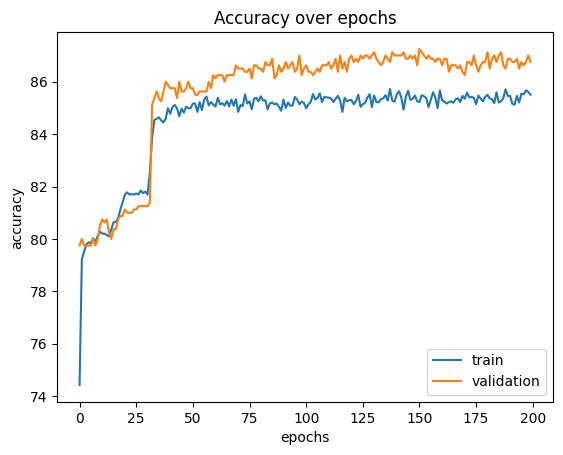

In [20]:
plt.plot(np.array(history.history['accuracy']) * 100)
plt.plot(np.array(history.history['val_accuracy']) * 100)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'validation'])
plt.title('Accuracy over epochs')
plt.show()

In [21]:
y_pred = classifier.predict(X_test)
print(y_pred[:5])

63/63 [==============================] - 0s 664us/step
[[0.34736758]
 [0.37604278]
 [0.26283768]
 [0.09331284]
 [0.1003078 ]]


In [22]:
y_pred = (y_pred > 0.5).astype(int)
print(y_pred[:5])

[[0]
 [0]
 [0]
 [0]
 [0]]


In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1529,   66],
       [ 205,  200]], dtype=int64)

In [24]:
print(((cm[0][0]+cm[1][1])*100)/(len(y_test)), '% of testing data was classified correctly')

86.45 % of testing data was classified correctly
